<img src="images/utfsm.png" alt="" width="100px" align="right"/>
# CCTVal_Introduction CFD

## Licencia y configuración del laboratorio
Ejecutar la siguiente celda mediante *`Ctr-S`*.

In [2]:
"""
IPython Notebook v4.0 para python 3.0
Pablo Bunout.
"""
# Configuración para recargar módulos y librerías dinámicamente
%reload_ext autoreload
%autoreload 2

# Configuración para graficos en línea
%matplotlib inline

# Configuración de estilo
from IPython.core.display import HTML
HTML(open("./style/style.css", "").read())

ValueError: empty mode string

## Introducción 

En el presente trabajo se propone realizar un estudio de como es afectada una placa de material solido definido, al ser expuesta bajo distintas condiciones térmicas y dinámicas, propias de un fluido circundante. Nos interesa la placa en el contexto de ser útilizada como aleta disipadora de calor en un sistema mecánico, por transferencia convectiva, y con ello poder concluir de forma óptima el material y dimensionamiento geométrico que más favorece a este hecho.

## Objetivos

1. Marco Teórico
2. Problema EDP
3. Sincronización de repositorio local y remoto
4. Clonar directamente un repositorio remoto en un directorio de trabajo local
5. Operaciones para repositorios remotos con más de un usuario
6. Ejercicio de práctica


## 1. Marco Teórico


### Ley de Conservación de Momentum
La 2da ley del Movimiento de  Newton establece que la fuerza total sobre un cuerpo rígido se relaciona mediante una cantidad inercial conocida como masa con la aceleración adquirida por este cuerpo. En tanto para medios continuos deformables, debemos considerar la derivada total de la cantidad de movimiento, en vez de la aceleración pro pia de un cuerpo rigido. 

Sabemos que para cualquier cantidad física vectorial clásica $\phi$, al aplicar la Ley de Conservación o Teorema de Transporte de Reynolds, integrando sobre un dominio definido, obtenemos lo siguiente.

$$\int_{\Omega } \frac{\partial \phi }{\partial t}dV = -\oint_{\partial \Omega } \phi (u\cdot \hat{n})dS + \int _{\Omega }\dot{\phi}_{source} dV$$

Si consideramos además que la cantidad $\phi$ es una densidad volumétrica de la cantidad de movimiento, entonces podemos reemplazarla por $\rho u$, donde $\rho$ corresponde a la densidad de masa y $u$ al campo de velocidades *(cantidad vectorial)*. De esta manera la ley de conservación que se obtiene al reemplazar esto último y considerando que no existen fuentes dentro del dominio.

$$\int_{\Omega } \frac{\partial (\rho u) }{\partial t}dV = -\oint_{\partial \Omega } (\rho u) (u\cdot \hat{n})dS$$

Luego la integral de superficie podemos modificarla aplicando el Teorema de la Divergencia *(Gauss)*, estableciendo que:

$$\oint_{\partial \Omega } (\phi \cdot \hat{n})dS = \int _{\Omega}(\nabla\cdot \phi) dV$$

Por otra parte sabemos que el signo menos que acompaña el término de superficie, se cancela con el producto interno entre $u\cdot\hat{n}dS$, obteniendo finalmente la expresión siguiente.

$$\int_{\Omega } \frac{\partial (\rho u) }{\partial t}dV + \int _{\Omega}\nabla\cdot (\rho uu) dV = 0$$

Basta entonces considerar que para que la ecuación se cumpla, al ser ambos términos integrales de volumen *(pequeñas sumas infinitesimales)*, agrupamos en solo una integral de volumen ambos términos y se deduce de que si la suma de ambos términos, es decir aplicada a cada volumen infinitesimal es cero, entonces la suma de estos sobre todos los elementos diferenciales resultara igualmente nula. De este modo con el razonamiento anterior deducimos la ecuación en su expresión diferencial.

$$ \frac{\partial (\rho u) }{\partial t} + \nabla\cdot (\rho uu)  = 0$$

La derivada total del momentum se conforma por dos términos, uno relacionado con la variación temporal parcial medida en un punto del espacio fijo y el cambio relativo de momentum, entre el mismo punto fijo y el fluido que lo atravieza, este último se conoce como término convectivo.

$$ \frac{d (\rho u)}{d t} = \frac{\partial (\rho u)}{\partial t} + \nabla \cdot (\rho uu) $$

Se dice que la expresión anterior es la forma conservativa de la derivada total de la cantidad de movimiento, puesto que se obtiene directamente de aplicar la ley de conservación integral aplicada a un dominio definido. En paralelo, la forma NO conservativa puede desarrollarse al expandir los términos de la ecuación.

$$ \rho \frac{\partial u}{\partial t} + u\frac{\partial \rho}{\partial t} + \rho u \cdot \nabla u + u \nabla \cdot (\rho u) $$

Agrupamos los términos de la siguiente manera y sucesivamente expandimos uno de ellos.

$$ \rho (\frac{\partial u}{\partial t} + u \cdot \nabla u) + u(\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho u)) $$

$$ \rho (\frac{\partial u}{\partial t} + u \cdot \nabla u) + u(\frac{\partial \rho}{\partial t} + \rho \nabla \cdot u + u \cdot \nabla \rho) $$

Una vez agrupados los términos como se mostró recientemente, se puede encontrar la derivada total de la densidad de masa que se define como sigue.

$$ \frac{d \rho}{d t} = \frac{\partial \rho}{\partial t} + u \cdot \nabla \rho  $$

Para flujos incompresibles se tiene que la derivada total de la densidad másica es nula, es decir $ \frac{d \rho}{d t} = 0 $. Además considerando la ecuación de continuidad surgida de la ley de conservación de masa, tenemos que $ \nabla \cdot u = 0 $. De este modo la expresión resultante para la derivada total de la cantidad de movimiento de un flujo incompresible es la siguiente:

$$ \frac{d (\rho u)}{d t} = \rho (\frac{\partial u}{\partial t} + u \cdot \nabla u) $$

Siendo esta última expresión, referente a la variación total de momentum, la que debe considerarse para la segunda ley de Newton *(expresada en su forma integral al ser una ley de conservación)*. Al relacionar la variación de momentum con las causas dinámicas que la originan, consideremos que existen fuerzas de dos naturalezas distintas, fuerzas de tipo superficial y las otras debido a la masa.

$$ \int \frac{d (\rho u)}{d t}dV = \oint \sigma\cdot \vec{n}dS + \int \rho \vec{b} dV$$

Para el término que involucra las fuerzas de tipo superficial, teniendo como variable principal los esfuerzos presentes en el medio, es posible aplicar nuevamente el Teorema de la Divergencia, transformando así una integral de superficie a una de volumen.

$$ \oint \sigma\cdot \vec{n}dS = \int \nabla \cdot \sigma dV $$

Luego traspasamos los términos a un lado de la ecuación, agrupándolos en una sola integral e igualando esta última a cero. Debido a que la integral es una cantidad que suma el valor del argumento en cada punto del dominio, un criterio para que se cumpla la igualdad es que el argumento debe ser nulo en cada punto del dominio y de esta manera obtenemos la ecuación diferencial de momentum a partir de la ecuación en su forma integral.

$$ \int ( \frac{d \rho u}{d t} - \nabla \cdot \sigma - \rho b ) dV = 0 $$

$$ \frac{d \rho u}{d t} - \nabla \cdot \sigma - \rho b = 0 $$

$$ \rho (\frac{\partial u}{\partial t} + u \cdot \nabla u) = \nabla \cdot \sigma + \rho b $$

$$ \frac{\partial u}{\partial t} + u \cdot \nabla u = \frac{1}{\rho}\nabla \cdot \sigma + b $$

#### Ecuación de Navier Stokes 

Para obtener la ecuación que gobierna la dinámica de fluidos en un flujo incompresible debemos plasmar las consideraciones cinemáticas y constitutivas realizadas anteriormente, con las que se obtuvo una expresión para el tensor de esfuerzos. Una vez que apliquemos el operador de divergencia al tensor de esfuerzos, reemplazaremos la expresión resultante en la ecuación diferencial de momentum.

$$ \sigma = -pI - \frac{2}{3} \mu \nabla \cdot u + \mu \nabla u $$

$$ \nabla \cdot \sigma = -

### Problema Bien Condicionado
Para que una Ecuación Diferencial Parcial tenga solución única, debe cumplir con ciertas condiciones necesarias. Estas han sido establecidas de múltiples formas mediante diversos teoremas de existencia y unicidad, siendo uno de los más conocidos el Teorema de Picard. En palabras sencillas la existencia y unicidad de la solución a la EDP, dependerá de las condiciones que tengamos tanto para la distribución inicial de la variable incógnita, cuando en la ecuación consideramos la variación temporal de esta, y las condiciones de frontera para cada dimensión espacial.

En el caso de la Ecuación del Calor, constatamos que la temperatura, variable incógnita, varía linealmente con el tiempo y en segundo grado con cada coordenada, por lo que necesitamos 1 condición temporal, conocida como condición inicial y 2 condiciones de frontera por cada coordenada espacial.

#### Condición Inicial 
Consiste en conocer la distribución de temperaturas en todo el dominio establecido, para un tiempo inicial de referencia. Dicho de otro modo, debemos conocer el valor del campo de temperatura en todo el medio sólido.

\begin{equation}
T(x,y,z,0)=f(x,y,z)
\end{equation}

#### Condición de Frontera tipo Dirichlet
Consiste en tener una distribución conocida de la variable incógnita en alguna frontera establecida. Por ejemplo podría ser la distribución de temperaturas en los extremos del dominio para la coordenada $x$, siendo $g(y,z,t)$  y $h(y,z,t)$ funciones cuyos valores se encuentran definidos.

\begin{equation}
T(0,y,z,t)=g(y,z,t)
\end{equation}

\begin{equation}
T(L,y,z,t)=h(y,z,t)
\end{equation}


#### Condición de Frontera tipo Neumann 
Consiste en conocer la variación de la variable incógnita respecto a alguna coordenada, en alguna frontera establecida. En nuestro caso, al considerar los extremos del dominio correspondientes a la coordenada $x$, la variación de temperaturas, físicamente coincide con el flujo de calor conducido, esto último puede verificarse con la Ley de Conducción de Fourier. 

De esta manera podemos interpretar una variedad de contextos físicos para un fenómeno térmico, como por ej. el caso de una pared aislada, en que el flujo de calor conducido atravez de ella es nulo.

Una superficie expuesta a transferencia por convección en un medio circundante, radiación térmica o incluso un flujo de calor conocido, proveniente de un cuerpo externo en contacto con la superficie de interes. En resumen, se puede escribir matemáticamente como sigue.

\begin{equation}
\frac{\partial T(0,y,z,t)}{\partial x}=g'(y,z,t)
\end{equation}

\begin{equation}
\frac{\partial T(L,y,z,t)}{\partial x}=h'(y,z,t)
\end{equation}

Por último debemos establecer las condiciones particulares de nuestro problema. En lo referente a las condiciones de borde, consideraremos una dominio rectangular en 3 dimensiones, que significara la placa. En una superficie tendremos un flujo de calor entrante definido $\dot{q}_{in}$ y en las superficies o fronteras restantes consideraremos que la placa se expone a un flujo de calor debido a la convección $\dot{q}_{conv}$, surgida del contacto con el fluido circundante. 

Sabemos de la Ley de Enfriamiento de Newton que el flujo de calor, producto del contacto entre una superficie sólida y un fluido puede modelarse a partir de una relación lienal con la diferencia de temperaturas entre la superficie $T_{pared}$ y la temperatura del fluido libre $T_{\infty}$, considerado como aquel que se encuentra fuera de la capa límite térmica, zona en la cual los efectos de la transferencia de calor hacia el fluido no son despreciables. Esto es posible mediante el uso de una constante denominda como *coeficiente de convección* $h_{conv}$, el cual es posible obtener de manera experimental y que dependera tanto de las propiedes del fluido como de las condiciones dinámicas de este.

\begin{equation}
\dot{q}_{conv} = h_{conv}\Delta T
\end{equation}

\begin{equation}
\Delta T = (T_{pared}-T_{\infty})
\end{equation}

## 2. Método de Resolución de Navier-Stokes (Fractional Step) 

Este método se emplea para la resolución de la ecuación de Navier-Stokes mediante un conjunto de técnicas numéricas que en conjunto otorgan una solución única. La particularidad de este método radica en obtener una ecuación con la que podamos desacoplar el campo de velocidades y el presiones, puesto que ambas variables se encuentran en una misma ecuación, lo que las hace depender una de la otra. Por otra parte la ecuación de continuidad, derivada de la ley para la conservación de masa, no nos entrega ninguna información extra útil para saber cómo se relacionan la presión y el campo de velocidades.

\begin{equation}
\frac{\partial u}{\partial t} + (u\cdot \nabla)u = -\frac{1}{\rho}\nabla p + \nu \nabla^{2}u -b
\end{equation}

### Método de Diferencias Finitas
Se utilizaran diferencias finitas para aproximar los términos de primeras y segundas derivadas de la ecuación, basándonos en las expansiones en series de Taylor de cada término.

##### Diferencias Centradas
La aproximación de la primera derivada en desarrollo de Taylor es el siguiente.

\begin{equation}
u(x+\Delta x)=u(x)+\frac{\partial u}{\partial x}\Delta x+\frac{1}{2!}\frac{\partial^2 u}{\partial x^2}\Delta x^{2}+\frac{1}{3!}\frac{\partial^3 u}{\partial x^3}\Delta x^{3}+\cdots 
\end{equation}

\begin{equation}
u(x+\Delta x)=u(x)-\frac{\partial u}{\partial x}\Delta x+\frac{1}{2!}\frac{\partial^2 u}{\partial x^2}\Delta x^{2}-\frac{1}{3!}\frac{\partial^3 u}{\partial x^3}\Delta x^{3}+\cdots 
\end{equation}

Para aproximar la primera derivada del campo de velocidades a partir de diferencias centradas, es necesario restar ambas ecuaciones y tras algunas manipulaciones para despejar el término de interes obtenemos lo siguiente.

\begin{equation}
\frac{\partial u}{\partial x} = \frac{u(x+\Delta x)-u(x-\Delta x)}{2\Delta x}+\frac{1}{3!}\frac{\partial^3 u}{\partial x^3}\Delta x^{3}+\cdots 
\end{equation}

La aproximación consiste en cambiar la serie infinita de Taylor de la derivada respecitva, por un polinomio o serie finita. Esto conduce a omitir términos de mayor orden de la serie, siendo estos los que componen el denominado error de truncamiento de la aproximación. Para el presente caso, este término es de orden 3 y se encuentra multiplicado por la cantidad $\Delta x^{3}$. En la práctica nos interesa saber cual es la magnitud más pequeña posible del error de truncamiento, quedando acotado por un mínimo, siendo este el valor del término de menor orden, evaluado en el punto. Lo anterior se debe a que al tener por referencia un valor mínimo para el error de truncamiento, aseguramos que nuestros resultados cumplan con cierta presición deseada, en caso de que los errores obtenidos se encuentren por debajo de la cota mínima establecida.

\begin{equation}
\frac{\partial u}{\partial x} \approx \frac{u(x+\Delta x)-u(x-\Delta x)}{2\Delta x}
\end{equation}

\begin{equation}
error_{t} \approx \frac{1}{3!}\frac{\partial^3 u}{\partial x^3}\Delta x^{2}
\end{equation}

##### Aproximación 2da Derivada
Para la aproximación de las derivadas de segundo orden, surgidas del Laplaciano del campo de velocidades, conocido como término viscoso, realizamos un desarrollo análogo al establecido para las diferencias centradas de 1er orden, con la salvedad de que en vez de restar las ecuaciones, sumaremos estas y deberemos considerar la expanción de Taylor, en ambos casos, hasta las derivadas de 4to orden. Una vez hecho esto, al despejar la 2da derivada obtenemos lo siguiente.

\begin{equation}
\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x+\Delta x) - 2u(x)  + u(x-\Delta x)}{\Delta x^{2}}
\end{equation}

\begin{equation}
error_{t} \approx \frac{1}{12}\frac{\partial^4 u}{\partial x^4}\Delta x^{2}
\end{equation}


##### Estabilidad del Método
Otro aspecto importante a mencionar, es la estabilidad del método numérico. La estabilidad numérica es una propiedad de todo algoritmo empleado para la resolución numérica de un problema, nos dice acerca de como pequeñas modificaciones en los datos de entrada, se propagan a travez del algoritmo. Un método estable es aquel que tiende a atenuar los errores generados en el algoritmo, ya sea por truncamiento de los términos o por redondeo. Este último tipo de error surge del hecho de útilizar un número finito de cifras significativas para representar una valor numérico real, ya que las computadoras tienen memoria limitada, lo que las obliga a acotar el número de decimales empleados, por lo general tienen una precisión de 8 o 16 cifras. 

Por otra parte, un método inestable es aquel que con pequeñas modificaciones en los datos de entrada, los resultados cambian abruptamente, debido a que los errores generados se magnifican de forma descontrolada, inutilizando al método para el problema abordado. Un modo de saber si el método de interes es estable o no, es utilizando el número de condición conocido como CFL (por la abreviación de Courant, Friedrichs, Lewy).

La diferencia entre el caso explícito e implícito se evidencia al reemplazar las discretizaciones respectivas de cada términos en la EDP. Antes de continuar, primero estableceremos una nueva nomenclatura para simplificar la terminología. Sea la temperatura de un nodo específico $T^{t}_{ijk}$, los subíndices $i,j,k$ referirán las coordenadas espaciales $x,y$ y $z$ respectivamente, y el superíndice $t$ para referir a un instante de tiempo determinado. 






### Estructura algoritmica de aproximación

El método consiste en darse un campo de velocidades arbitrario, que puede no tener ninguna relación con el campo de velocidades físico, siendo a partir de este campo ficticio que se obtiene una velocidad predictiva *(o si se prefiere auxiliar)*, que involucra los términos viscoso y convectivo sin considerar presión alguna.

$$ \frac{\partial u^{*}}{\partial t} = - (u\cdot \nabla)u + \nu  \nabla^{2}u $$

El término temporal lo discretizamos de forma explícita. Obteniendo los términos viscoso y convectivo referidos al tiempo anterior $t$.

$$ \frac{u^{*}-u^{t}}{\Delta t} = - (u^{t}\cdot \nabla)u^{t} + \nu  \nabla^{2}u^{t} $$

Para el método de paso fraccionario se utilizan diferencias finitas para la discretización de las derivadas espaciales, tanto para las velocidades como la presión, teniendo 2 ecuaciones derivadas de la conservación de momentum lineal.

$$ \frac{u^{*}-u}{\Delta t} = -\left ( u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y}\right ) + \nu \left ( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right ) $$

$$ \frac{v^{*}-v}{\Delta t} = -\left ( u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y}\right ) + \nu \left ( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2}\right ) $$

Los términos de 2do orden se discretizan por diferencias centradas, mientras que las derivadas en el término convectivo se hacen por diferencias de primer orden backward. Reemplazando los términos en las ecuaciones obtenemos lo siguiente.

$$ \frac{u(x,y)^{*}-u(x,y)^{t}}{\Delta t} = -\left ( u(x,y)\frac{u(x,y) - u(x-\Delta x,y)}{\Delta x} + v(x,y)\frac{u(x,y) - u(x,y-\Delta y)}{\Delta y}\right )^{t} + ... $$
$$ ... + \nu \left (\frac{u(x+\Delta x,y) - 2u(x,y)  + u(x-\Delta x,y)}{\Delta x^{2}} + \frac{u(x,y+\Delta y) - 2u(x,y)  + u(x,y-\Delta y)}{\Delta y^{2}}\right )^{t} $$

### Método de Adams-Bashforth 
#### *(Refinamiento del algoritmo)*  

Debido a que en la aproximación explícita empleada para la discretización del término temporal se tiene un error asociado importante. Se busca reducir este error empleando 2 tiempos sucesivos hacia atrás para obtener una velocidad predictiva que se acerque más a la realidad.

$$ R(u^{t}) = -(u^{t}\cdot \nabla)u^{t} + \nu \nabla^{2}u^{t} $$

$$ R(u^{*}) = \frac{1}{2}\left ( 3R(u^{t}) - R(u^{t-1})\right ) $$

$$ u^{*} = u^{t} + \frac{\Delta t }{2}R(u^{*}) $$

Vemos que esta aproximación es una especie de promedio entre los valores de las velocidades en los tiempos anteriores sucesivos, similar a los métodos explícitos pertenecientes a la familia de los Runge-Kutta, con la particularidad de que no hay necesidad de aproximar la variable buscada en tiempos intermedios, puesto que se tiene a disposición la información de la velocidad en el tiempo anterior. Esto hace que el método de Adams-Bashforth sea más eficiente que un método Runge-Kutta en cuanto al tiempo computacional empleado para un resultado, lo que no quiere decir que sea más exacto.

Algo muy importante que se debe tener en cuenta, es que debido a que el método Adams-Bashforth utiliza 2 tiempos anteriores para cada aproximación del campo de velocidades auxiliar, no es posible emplearlo en la primera iteración temporal, ya que solo contamos con el valor de la velocidad en el tiempo inicial, lo que implica que para la primera iteración temporal debemos aproximar la velocidad predictiva de la forma explícita corriente. 

Una vez obtenida nuestra velocidad predictiva $u^{*}$, procedemos a calcular la presión a partir de la ecuación de Poisson. Pero esta la derivamos al aplicar la divergencia a la ecuación que considera las velocidades del tiempo posterior y las velocidades predictivas.

$$ \frac{\partial u^{t+1}}{\partial t} = -\frac{1}{\rho}\nabla p^{t+1} $$

Nuevamente el termino temporal lo discretizamos de forma explícita como sigue.

$$ \frac{u^{*}-u^{t}}{\Delta t} = -\frac{1}{\rho}\nabla p^{t+1} $$



### Resolución de Ecuación de Poisson para la Presión

Al aplicar la divergencia a ambos lados de la ecuación de Navier-Sokes, se obtiene la eucación de Poisson para el campo de presión. Para su resolución imponemos la restricción de que la divergencia del campo de velocidades resultante, referido al instante de tempo *t+1*, debe ser nula, cumpliendo con la ecuación de continuidad teórica obtenida de la ley de conservación de masa para un fluido incompresible.

$$ \nabla\cdot \left ( \frac{u^{t+1}-u^{*}}{\Delta t} \right ) = -\nabla \left ( \frac{1}{\rho}\nabla p^{t+1} \right ) $$

$$ \nabla \cdot u^{t+1} = 0 $$

Recalcamos el hecho de que debido a que el campo de velocidades predictivo o auxiliar, es solo una aproximación que contiene un error asociado, ocurre entonces que la divergencia de este campo de velocidades, no será nula como esperaríamos teóricamente. De este modo la ecuación de Poisson para la presión se expresa como sigue.

$$ \nabla^{2} p^{t+1} = \frac{\rho}{\Delta t} \nabla \cdot u^{*} $$

### Discretizacion ecuación de Poisson de presión 

Una vez planteada la ecuación de Poisson, al igual que para las ecuaciones de momentum formuladas para las componentes del campo de velocidades, se debe discretizar las derivadas de 2do orden basandose en diferencias centradas. Las derivadas del campo de velocidades predictivo que aparecen con la divergencia, se discretizan a partir de diferencias finitas centradas, de modo que la aproximación tanto para la presión como para la velocidad tenga igual presición. Cabe mencionar que la presion esta referidas al tiempo *t+1*.

$$ \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = \frac{\rho}{\Delta t}\left ( \frac{\partial u^{*}}{\partial x} + \frac{\partial v^{*}}{\partial y}\right ) $$

$$  \left ( \frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{\Delta x^{2}} + \frac{p_{i,j+1} - 2p_{i,j} + p_{i,j-1}}{\Delta y^{2}} \right ) = \frac{\rho}{\Delta t}\left ( \frac{u^{*}_{i+1,j} - u^{*}_{i-1,j}}{\Delta x} + \frac{v^{*}_{i,j+1} - v^{*}_{i,j-1}}{\Delta y}\right ) $$

Si consideramos que las dimensiones espaciales son iguales para cada celda en el dominio discretizado, $\Delta x = \Delta y$, entonces al reagrupar los términos de la ecuación de Poisson discretizada obtenemos.

$$ 4p_{i,j} - p_{i+1,j} - p_{i-1,j} - p_{i,j+1} - p_{i,j-1} = (-)\frac{\rho \Delta x}{\Delta t} \left ( u^{*}_{i+1,j} - u^{*}_{i-1,j} + v^{*}_{i,j+1} - v^{*}_{i,j-1} \right ) $$

De lo anterior vemos al ser el campo de presiones desconocido, tenemos 5 incognitas para 1 sola ecuación. Esto nos lleva  la necesidad de plantear un sistema implícito, obteniendo un sistema lineal de ecuaciones y consecuentemente algún método para la resolución de este.

### Condiciones de Borde para el campo de resión y velocidades

#### Condición de Pared *(Neumann)*
Debido a que el dominio se encuentra límitado por dos paredes, superior e inferior respectivamente, la presión en ambas se genera debido a que el flujo choca contra la pared a nivel de partículas. Estas interacciones locales de las partículas del fluido con la pared, producen una presión sea máxima normal a la superficie. Matemáticamente esto puede traducirse como el valor nulo del gradiente de presión en la dirección normal a la superficie.

$$ \frac{\partial p}{\partial n}\hat{n} = 0 $$

Lo anterior nos induce a plantiar el problema discretizando la derivada parcial a partir de diferencias centradas, y de este modo solucionamos el conflicto al tratar con un nodo imaginario generado a partir de la discretización usada en la ecuación de Poisson. La condensación de la presión en el nodo imaginario, considerando que las superficies son paralelas al eje de las abcisas, siendo caracterizadas por la normal en la dirección $x$, se expresa de la siguiente manera.

$$ \frac{p_{i,j+1}-p_{i,j-1}}{2\Delta y} $$

En el caso de la pared inferior, el nodo imaginario tiene coordenadas $p_{i,0}$ y la pared superior $p_{i,m+1}$. Aplicando la ecuación anterior establecida, ambas presiones ficticias serán reemplazadas por las presiones evaluadas en los nodos vecinos de las superficies respectivas, ubicados dentro del dominio.

$$ p_{0,j} = p_{2,j} $$

$$ p_{n+1,j} = p_{n-1,j} $$

##### Condición de pared himpermeable
Para el caso de las veocidades en una condición de pared, se considera que el flujo no penétra la superficie *(en caso de un medio poroso esto ya no es válido)*, lo que conduce a que las componentes de velocidades en la dirección normal a la superficie, evaluadas en los nodos ficticios y en la pared sean nulas.

$$ v_{i,1} = 0 $$

$$ v_{i,m} = 0 $$

##### Condición de no deslizamiento
Por otra parte para las componentes del campo de velocidades paralelas a la superficie, se considera la condición de no deslizamiento, esto hace que la componente de la velocidad en la pared sea nula.

$$ u_{i,1} = 0 $$

$$ u_{i,m} = 0 $$

#### Condición de Peridiocidad  *(Dirichlet)*
Esta condición de borde considera que el flujo de entrada de salida deben tener iguales condiciones dinámicas. La peridiocidad implica que ciertos valores en la entrada y salida, para un mismo tiempo dado, deben ser iguales, esto se cumple tanto para el campo de presiones como las componentes del campo de velocidades, cualquier otra cantidad física escalar como la temperatura, caben dentro de esta condición. Finalmente puede interpretarse la condición periodica, como el tramo de una tubería que se reproduce así misma a lo largo de esta.

Respecto al campo de presión, los nodos ficticios serán reemplazados por los nodos ubicados dentro del dominio de forma alternada, es decir el nodo ficticio de la entrada se igualara al nodo vecino a la frontera de la salida y viceversa.

$$ p_{0,j} = p_{n-1,j} $$

$$ p_{n+1,j} = p_{1,j} $$

Para el caso de las velocidades, se llega al mismo resultado, igualando las velocidades alternadas en la entrada y salida, pero esto debido a que es la única forma de conservar la peridiocidad.

$$ u_{0,j} = u_{n-1,j} $$

$$ u_{n+1,j} = u_{1,j} $$

### Generación de Matriz para Método Implícito
En el caso de un problema en 2 dimensiones, al aplicar la discretización mencionada obtendremos 9 ecuaciones de estructuras distintas. Las 4 esquinas, los bordes superior e inferior más los bordes laterales, sin contar los nodos ubicados en las esquinas y por último el centro del dominio. Escribiremos las ecuaciones mencionadas a continuación.

##### Esquina Inferior Izquierda

$ 4p_{1,1} - p_{2,1} - p_{0,1} - p_{1,2} - p_{1,0} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,1} - u^{*}_{0,1} + v^{*}_{1,2} + v^{*}_{1,0} \right ) $

$ 4p_{1,1} - p_{2,1} - p_{n-1,1} - 2p_{1,2} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,1} - u^{*}_{n-1,1} + v^{*}_{1,2} \right ) $

##### Borde Inferior 
$(2 \leq i \leq N-1)$

$ 4p_{i,1} - p_{i+1,1} - p_{i-1,1} - p_{i,2} - p_{i,0} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{i+1,1} - u^{*}_{i-1,1} + v^{*}_{i,2} + v^{*}_{i,0} \right ) $

$ 4p_{i,1} - p_{i+1,1} - p_{i-1,1} - 2p_{i,2} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{i+1,1} - u^{*}_{i-1,1} + v^{*}_{i,2} \right ) $

##### Esquina Inferior Derecha

$ 4p_{n,1} - p_{n+1,1} - p_{n-1,1} - p_{n,2} - p_{n,0} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{n+1,1} - u^{*}_{n-1,0} + v^{*}_{n,2} + v^{*}_{n,0} \right ) $

$ 4p_{n,1} - p_{2,1} - p_{n-1,1} - 2p_{n,2} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,1} - u^{*}_{n-1,1} + v^{*}_{n,2} \right ) $

##### Borde Lateral Izquierdo
$(2 \leq j \leq M-1)$

$ 4p_{1,j} - p_{2,j} - p_{0,j} - p_{1,j+1} - p_{1,j-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,j} - u^{*}_{0,j} + v^{*}_{1,j+1} + v^{*}_{1,j-1} \right ) $

$ 4p_{1,j} - p_{2,j} - p_{n-1,j} - p_{1,j+1} - p_{1,j-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,j} - u^{*}_{n-1,j} + v^{*}_{1,j+1} + v^{*}_{1,j-1} \right ) $

##### Centro del Dominio
$(2 \leq i \leq N-1)$

$(2 \leq j \leq M-1)$

$ 4p_{i,j} - p_{i+1,j} - p_{i-1,j} - p_{i,j+1} - p_{i,j-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{i+1,j} - u^{*}_{i-1,j} + v^{*}_{i,j+1} + v^{*}_{i,j-1} \right ) $

##### Borde Lateral Derecho
$(2 \leq j \leq M-1)$

$ 4p_{n,j} - p_{n+1,j} - p_{n-1,j} - p_{n,j+1} - p_{n,j-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{n+1,j} - u^{*}_{n-1,j} + v^{*}_{n,j+1} + v^{*}_{n,j-1} \right ) $

$ 4p_{n,j} - p_{2,j} - p_{n-1,j} - p_{n,j+1} - p_{n,j-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,j} - u^{*}_{n-1,j} + v^{*}_{n,j+1} + v^{*}_{n,j-1} \right ) $

#### Esquina Superior Izquierda

$ 4p_{1,m} - p_{2,m} - p_{0,m} - p_{1,m+1} - p_{1,m-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,m} - u^{*}_{0,m} + v^{*}_{1,m+1} + v^{*}_{1,m-1} \right ) $

$ 4p_{1,m} - p_{2,m} - p_{n-1,m} - 2p_{1,m-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,m} - u^{*}_{n-1,m} + v^{*}_{1,m-1} \right ) $

##### Borde Superior
$(2 \leq i \leq N-1)$

$ 4p_{i,m} - p_{i+1,m} - p_{i-1,m} - p_{i,m+1} - p_{i,m-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{i+1,m} - u^{*}_{i-1,m} + v^{*}_{i,m+1} + v^{*}_{i,m-1} \right ) $

$ 4p_{i,m} - p_{i+1,m} - p_{i-1,m} - 2p_{i,m-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{i+1,m} - u^{*}_{i-1,m}  + v^{*}_{i,m-1} \right ) $

##### Esquina Superior Derecha

$ 4p_{n,m} - p_{n+1,m} - p_{n-1,m} - p_{n,m+1} - p_{n,m-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{n+1,m} - u^{*}_{n-1,m} + v^{*}_{n,m+1} + v^{*}_{n,m-1} \right ) $

$ 4p_{n,m} - p_{2,m} - p_{n-1,m} - 2p_{n,m-1} = \frac{\rho \Delta x}{2\Delta t} \left ( u^{*}_{2,m} - u^{*}_{n-1,m} + v^{*}_{n,m-1} \right ) $

En más detalle, el sistema es:

\begin{align}
 &\begin{array}{c c c c c c c c c c c c c c c c}
|\leftarrow & & & N-2 & & \rightarrow| & &  & & & & & & & &
\end{array}\\
\begin{array}{c}
\overline{\uparrow} \\
\\
N-2 \\
\\
\\
\underline{\downarrow} \\
\uparrow\\
\\
N-2\\
\underline{\downarrow}\\
\\
\\
\\
\overline{\uparrow}\\
\\
N-2\\
\\
\underline{\downarrow}\\
\end{array}
&\left[
\begin{array}{c c c c c c c c c c c c c c c c c c}
4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & & & & & 0 \\
-1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & & & & 0 \\
0 & -1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & & & 0 \\
\vdots & & & & & & & & & & & & & & & & & \\
0 & \cdots & 0 & -1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & & 0 \\
0 & \cdots  & & 0 & -1 & 3 & 0 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & & 0 \\
-1 & 0 & \cdots & & 0 & 0 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & & 0 \\
0 & -1 & 0 & \cdots & & 0 & -1 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & & & 0 \\
\vdots & & & & & & & & & & & & & & & & \\
0 & \cdots & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & 0 & & \cdots & 0 & -1 & 0 & \cdots & & 0 \\
0 & \cdots & & 0 & -1 & 0 & \cdots & & 0 & 4 & -1 & 0 & \cdots & 0 & -1 & 0 & \cdots & 0 \\
\vdots & & & & & & & & & & & & & & & & & \\
0 & \cdots & & & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & 0 & \cdots & 0 & -1 & 0 & \cdots & 0 \\
0 & \cdots & & & & 0 & -1 & 0 & \cdots & 0 & 0 & 3 & -1 & 0 & \cdots & & & 0 \\
0 & \cdots & & & & & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & -1 & 0 & \cdots & & 0 \\
\vdots & & & & & & & & & & & & & & & & & \\
0 & \cdots & & & & & & & & & 0 & -1 & 0 & \cdots & 0 & -1 & 3 & -1 \\
0 & \cdots & & & & & & & & & & 0 & -1 & 0 & \cdots & 0 & -1 & 2 \\
\end{array}
\right] \\
\cdot
&\left[
\begin{array}{c}
\phi_{1,1} \\
\phi_{2,1}\\
\phi_{3,1} \\
\vdots\\
\phi_{N-3,1}\\
\phi_{N-2,1}\\
\phi_{1,2}\\
\phi_{2,2}\\
\vdots\\
\phi_{N-2,2}\\
\phi_{1,3}\\
\vdots\\
\phi_{N-2,N-3}\\
\phi_{1,N-2}\\
\phi_{2,N-2}\\
\vdots\\
\phi_{N-3,N-2}\\
\phi_{N-2,N-2}\\
\end{array}
\right]
=
-\Delta^2 \cdot
\left[
\begin{array}{c}
f_{1,1} \\
f_{2,1}\\
f_{3,1} \\
\vdots\\
f_{N-3,1}\\
f_{N-2,1}\\
f_{1,2}\\
f_{2,2}\\
\vdots\\
f_{N-2,2}\\
f_{1,3}\\
\vdots\\
f_{N-2,N-3}\\
f_{1,N-2}\\
f_{2,N-2}\\
\vdots\\
f_{N-3,N-2}\\
f_{N-2,N-2}\\
\end{array}
\right]
+
\left[
\begin{array}{c}
\phi_0 + \phi_1 \\
\phi_1\\
\phi_1 \\
\vdots\\
\phi_1\\
\phi_1 + \Delta \cdot a\\
\phi_0\\
0\\
\vdots\\
\Delta \cdot a\\
\phi_0\\
\vdots\\
\Delta \cdot a\\
\phi_0 + \Delta \cdot b\\
\Delta \cdot b\\
\vdots\\
\Delta \cdot b\\
\Delta \cdot b + \Delta \cdot a\\
\end{array}
\right]
\end{align} 


Luego de obtener la presión mediante algún método de resolución de sistemas lineales, estamos en condiciones de obtener finalmente el campo de velocidades corregido a partir de la presión y la velocidad predictiva, considerando además algún termino fuente de aceleración.

$$ u^{t+1} = u^{*}-\left ( \frac{\Delta t}{\rho} \right )\nabla p^{t+1} $$

In [2]:
#MÉTODO EULER_EXPLÍCITO 2D

def euler_explicito(T, dt, dx, dy, nx, ny, alpha, k, h, T_aux, T_down, T_up, T_left, T_right):
    
        #esquina inf_izq
        T[0,0] = (1 - 4*alpha*dt/dx**2)*T_aux[0,0] + (alpha*dt/dx**2)*(T_left[0] + T_aux[1,0] + T_down[0] + T_aux[0,1])
    
        #esquina sup_izq
        T[0,ny-1] = (1 - 4*alpha*dt/dx**2)*T_aux[0,ny-1] + (alpha*dt/dx**2)*(T_left[ny-1] + T_aux[1,ny-1] + T_aux[0,ny-2] + T_up[0])
    
        #esquina inf_derch
        T[nx-1,0] = (1 - 4*alpha*dt/dx**2)*T_aux[nx-1,0] + (alpha*dt/dx**2)*(T_right[0] + T_aux[nx-2,0] + T_aux[nx-1,1] + T_down[ny-1])
    
        #esquina sup_derch
        T[nx-1,ny-1] = (1 - 4*alpha*dt/dx**2)*T_aux[nx-1,ny-1] + (alpha*dt/dx**2)*(T_right[ny-1] + T_aux[nx-2,ny-1] + T_up[ny-1] + T_aux[nx-1,ny-2])
        
        #borde izquierdo
        for j in range(1,ny-1):
            T[0,j] = (1 - 4*alpha*dt/dx**2)*T_aux[0,j] + (alpha*dt/dx**2)*(T_left[j] + T_aux[1,j] + T_aux[0,j-1] + T_aux[0,j+1])
    
        #borde derecho
        for j in range(1,ny-1):
            T[nx-1,j] = (1 - 4*alpha*dt/dx**2)*T_aux[nx-1,j] + (alpha*dt/dx**2)*(T_right[j] + T_aux[nx-2,j] + T_aux[nx-1,j-1] + T_aux[nx-1,j+1])
    
        #borde inferior
        for i in range(1,nx-1):
            T[i,0] = (1 - 4*alpha*dt/dx**2)*T_aux[i,0] + (alpha*dt/dx**2)*(T_aux[i+1,0] + T_aux[i-1,0] + T_aux[i,1] + T_down[i])
    
        #borde superior
        for i in range(1,nx-1):
            T[i,ny-1] = (1 - 4*alpha*dt/dx**2)*T_aux[i,ny-1] + (alpha*dt/dx**2)*(T_aux[i+1,ny-1] + T_aux[i-1,ny-1] + T_down[i] + T_aux[i,ny-2])
         
        #centro del dominio
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                T[i,j] = (1 - 4*alpha*dt/dx**2)*T_aux[i,j] + (alpha*dt/dx**2)*(T_aux[i-1,j] + T_aux[i+1,j] + T_aux[i,j-1] + T_aux[i,j+1])
              
        return T

In [4]:
#DEFINICIÓN CONDICIONES DE BORDE 

#temp. fict. borde izquierdo
def u_left(u_left, T, dt, dx, dy, nx, ny, alpha, k, q_in, h, T_inf, T_aux):

     for j in range(0,ny):
        T_left[j] =  T_aux[1,j] + (2*dx/k)*q_in
    return T_left

#temp. fict. borde derecho        
def u_right(T_right, T, dt, dx, dy, nx, ny, alpha, k, q_in, h, T_inf, T_aux):

    for j in range(0,ny):
        u_right[j] =  T_aux[nx-2,j] + (2*h*dy/k)*(T_inf - T_aux[nx-1,j]) 
    return T_right

#temp. fict. borde inferior 
def temp_down(T_down, T, dt, dx, dy, nx, ny, alpha, k, q_in, h, T_inf, T_aux):    

     for i in range(0,nx):
        T_down[i] = T_aux[i,1] + (2*h*dy/k)*(T_inf - T_aux[i,0])     
    return T_down

#temp. fict. borde superior
def temp_up(T_up, T, dt, dx, dy, nx, ny, alpha, k, q_in, h, T_inf, T_aux):    
 
      for i in range(0,nx):
        T_up[i] = T_aux[i,ny-2] + (2*h*dy/k)*(T_inf - T_aux[i,ny-1])
    return T_up

IndentationError: unindent does not match any outer indentation level (<ipython-input-4-9173c078c3f4>, line 8)

In [34]:
#Master CODE
#Fractional Step Method for solution of Navier-Stokes Equation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from math import pi

#np=1000

#Definition Principal Dimensions od Domain
lx = 1.
ly = 1.
lt = 0.2

dx = 0.2
dy = 0.2
dt = 0.05

tempo = 0.

nx = int((lx/dx)+1)
ny = int((ly/dx)+1)
nt = int(lt/dt)

x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)

A_B = 2

#q = nx*ny

F = 1.0
G = 0.0

#Definition of Physical Properties
rho = 1.
vis = 1.6e-4

u_in = 1.
v_in = 0.

u = np.zeros((nx,ny))
v = np.zeros((nx,ny))
u_o = np.zeros((nx,ny))
v_o = np.zeros((nx,ny))
u_aux = np.zeros((nx,ny))
v_aux = np.zeros((nx,ny))

u_left = np.zeros((ny))
u_right = np.zeros((ny))
u_down = np.zeros((nx))
u_up = np.zeros((nx))

v_left = np.zeros((ny))
v_right = np.zeros((ny))
v_down = np.zeros((nx))
v_up = np.zeros((nx))

R_u = np.zeros((nx,ny,A_B))
R_v = np.zeros((nx,ny,A_B))


#condición inicial
for i in range(0,nx):
    for j in range(0,ny):
        u_o[i,j] = 0.
        v_o[i,j] = 0.
        
u = u_o.copy()
v = v_o.copy()

#print u
#print
#********************************************************************************************************************************


#ITERACION EXPLICITA PARA VELOCIDADES

for t in range(1,nt):
    print "Iteration Number :", t
    print "Time :",tempo + dt
    print
    
#####################################################################################################################       
    
    #Definition of Velocity Field for Boundary Conditions
    for j in range(0,ny):
        for i in range(0,nx):
            
            #No Slip and Impermeable Wall Boundary Conditions
            if i == 0 or i == nx-1: 
                u[i,j] = 0.
                u_left[j] = 0. 
                u_right[j] = 0. 
                        
                v[i,j] = 0.   
                v_left[j] = 0. 
                v_right[j] = 0. 
              
            #Velocity Inlet Boundary Conditions
            elif j == 0 and 0 < i < nx-1:
                u[i,j] = 0.
                u_down[i] = u[i,j] 
                
                v[i,j] = 1.
                v_down[i] = v[i,j]
            
            #Outflow Boundary Conditions 
            #(the velocity field must be calculed on the upper-edge of domain)
            #Velocity Outlet Boundary Conditions
            #elif j == ny-1 and 0 < i < nx-1:
                #if u_aux[i,j] > 0.:
                    #u[i,j] = u_aux[i,j] - (dt/dx)*(p[i,j] - p[i-1,j])
                #elif u_aux[i,j] < 0.:
                    #u[i,j] = u_aux[i,j] - (dt/dx)*(p[i+1,j] - p[i,j])
                #elif u_aux[i,j] == 0.:
                    #u[i,j] = u_aux[i,j] - (dt/2*dx)*(p[i+1,j] - p[i-1,j])
                
                #u[i,j] = 0.
                #v[i,j] = 0.#v_aux[i,j] - (dt/dy)*(p[i,j] - p[i,j-1])
                
#####################################################################################################################                   

    #Calculation of the Auxiliary Velocity Field

    #Bottom_left corner            
    if u[0,0] >= 0.:
        R_u[0,0,1]= -((1/dx)*u[0,0]*(u[0,0] - u_left[0]) + (1/dy)*v[0,0]*(u[0,0] - u_down[0])) \
                    + vis*((1/dx**2)*(u[1,0] - 2*u[0,0] + u_left[0]) + (1/dy**2)*(u[0,1] - 2*u[0,0] + u_down[0]))
    else:
        R_u[0,0,1]= -((1/dx)*u[0,0]*(u[1,0] - u[0,0]) + (1/dy)*v[0,0]*(u[0,1] - u[0,0])) \
                    + vis*((1/dx**2)*(u[1,0] - 2*u[0,0] + u_left[0]) + (1/dy**2)*(u[0,1] - 2*u[0,0] + u_down[0]))
           
    if v[0,0] >= 0.:
        R_v[0,0,1]= -((1/dx)*u[0,0]*(v[0,0] - v_left[0]) + (1/dy)*v[0,0]*(v[0,0] - v_down[0])) \
                    + vis*((1/dx**2)*(v[1,0] - 2*v[0,0] + v_left[0]) + (1/dy**2)*(v[0,1] - 2*v[0,0] + v_down[0]))
    else:
        R_v[0,0,1]= -((1/dx)*u[0,0]*(v[1,0] - v[0,0]) + (1/dy)*v[0,0]*(v[0,1] - v[0,0])) \
                    + vis*((1/dx**2)*(v[1,0] - 2*v[0,0] + v_left[0]) + (1/dy**2)*(v[0,1] - 2*v[0,0] + v_down[0]))
            

    #Upper_left corner           
    if u[0,ny-1] >= 0:
        R_u[0,ny-1,1] = -((1/dx)*u[0,ny-1]*(u[0,ny-1] - u_left[ny-1]) + (1/dy)*v[0,ny-1]*(u[0,ny-1] - u[0,ny-2]))\
            + vis*((1/dx**2)*(u[1,ny-1] - 2*u[0,ny-1] + u_left[ny-1]) + (1/dy**2)*(u_up[0] - 2*u[0,ny-1] + u[0,ny-2]))
            
    else:
        R_u[0,ny-1,1] = -((1/dx)*u[0,ny-1]*(u[1,ny-1] - u[0,ny-1]) + (1/dy)*v[0,ny-1]*(u_up[0] - u[0,ny-1]))\
            + vis*((1/dx**2)*(u[1,ny-1] - 2*u[0,ny-1] + u_left[ny-1]) + (1/dy**2)*(u_up[0] - 2*u[0,ny-1] + u[0,ny-2]))
    
    if v[0,ny-1] >= 0:
        R_v[0,ny-1,1] = -((1/dx)*u[0,ny-1]*(v[0,ny-1] - v_left[ny-1]) + (1/dy)*v[0,ny-1]*(v[0,ny-1] - v[0,ny-2]))\
            + vis*((1/dx**2)*(v[1,ny-1] - 2*v[0,ny-1] + v_left[ny-1]) + (1/dy**2)*(v_up[0] - 2*v[0,ny-1] + v[0,ny-2]))
            
    else:
        R_v[0,ny-1,1] = -((1/dx)*u[0,ny-1]*(v[1,ny-1] - v[0,ny-1]) + (1/dy)*v[0,ny-1]*(v_up[0] - v[0,ny-1]))\
            + vis*((1/dx**2)*(v[1,ny-1] - 2*v[0,ny-1] + v_left[ny-1]) + (1/dy**2)*(v_up[0] - 2*v[0,ny-1] + v[0,ny-2]))
       

    #Bottom_right corner:          
    if u[nx-1,0] >= 0:
        R_u[nx-1,0,1]= -((1/dx)*u[nx-1,0]*(u[nx-1,0] - u[nx-2,0]) + (1/dy)*v[nx-1,0]*(u[nx-1,0] - u_down[nx-1])) \
            + vis*((1/dx**2)*(u_right[0] - 2*u[nx-1,0] + u[nx-2,0]) + (1/dy**2)*(u[nx-1,1] - 2*u[nx-1,0] + u_down[nx-1]))
    else:
        R_u[nx-1,0,1]= -((1/dx)*u[nx-1,0]*(u_right[0] - u[nx-1,0]) + (1/dy)*v[nx-1,0]*(u[nx-1,1] - u[nx-1,0])) \
            + vis*((1/dx**2)*(u_right[0] - 2*u[nx-1,0] + u[nx-2,0]) + (1/dy**2)*(u[nx-1,1] - 2*u[nx-1,0] + u_down[nx-1]))
           
    if v[nx-1,0] >= 0:
        R_v[nx-1,0,1]= -((1/dx)*u[nx-1,0]*(v[nx-1,0] - v[nx-2,0]) + (1/dy)*v[nx-1,0]*(v[nx-1,0] - v_down[nx-1])) \
            + vis*((1/dx**2)*(v_right[0] - 2*v[nx-1,0] + v[nx-2,0]) + (1/dy**2)*(v[nx-1,1] - 2*v[nx-1,0] + v_down[nx-1]))
    else:
        R_v[nx-1,0,1]= -((1/dx)*u[nx-1,0]*(v_right[0] - v[nx-1,0]) + (1/dy)*v[nx-1,0]*(v[nx-1,1] - v[nx-1,0])) \
            + vis*((1/dx**2)*(v_right[0] - 2*v[nx-1,0] + v[nx-2,0]) + (1/dy**2)*(v[nx-1,1] - 2*v[nx-1,0] + v_down[nx-1]))
                         
 
    #Upper_right corner:          
    if u[nx-1,ny-1] >= 0.:
        R_u[nx-1,ny-1,1]= -((1/dx)*u[nx-1,ny-1]*(u[nx-1,ny-1] - u[nx-2,ny-1]) + (1/dy)*v[nx-1,ny-1]*(u[nx-1,ny-1] - u[nx-1,ny-2]))\
            + vis*((1/dx**2)*(u_right[ny-1] - 2*u[nx-1,ny-1] + u[nx-2,ny-1]) + (1/dy**2)*(u_up[nx-1] - 2*u[nx-1,ny-1] + u[nx-1,ny-2]))
    else:
        R_u[nx-1,ny-1,1]= -((1/dx)*u[nx-1,ny-1]*(u_right[ny-1] - u[nx-1,ny-1]) + (1/dy)*v[nx-1,ny-1]*(u_up[nx-1] - u[nx-1,ny-1]))\
            + vis*((1/dx**2)*(u_right[ny-1] - 2*u[nx-1,ny-1] + u[nx-2,ny-1]) + (1/dy**2)*(u_up[nx-1] - 2*u[nx-1,ny-1] + u[nx-1,ny-2]))
           
    if v[nx-1,ny-1] >= 0.:
        R_v[nx-1,ny-1,1]= -((1/dx)*u[nx-1,ny-1]*(v[nx-1,ny-1] - v[nx-2,ny-1]) + (1/dy)*v[nx-1,ny-1]*(v[nx-1,ny-1] - v[nx-1,ny-2]))\
            + vis*((1/dx**2)*(v_right[ny-1] - 2*v[nx-1,ny-1] + v[nx-2,ny-1]) + (1/dy**2)*(v_up[nx-1] - 2*v[nx-1,ny-1] + v[nx-1,ny-2]))
    else:
        R_v[nx-1,ny-1,1]= -((1/dx)*u[nx-1,ny-1]*(u_right[ny-1] - u[nx-1,ny-1]) + (1/dy)*v[nx-1,ny-1]*(v_up[nx-1] - u[nx-1,ny-1]))\
            + vis*((1/dx**2)*(v_right[ny-1] - 2*v[nx-1,ny-1] + v[nx-2,ny-1]) + (1/dy**2)*(v_up[nx-1] - 2*v[nx-1,ny-1] + v[nx-1,ny-2]))


    #Left edge of domain:
    for j in range(1,ny-1):
        if u[0,j] >= 0:                     
            R_u[0,j,1]= -((1/dx)*u[0,j]*(u[0,j] - u_left[j]) + (1/dy)*v[0,j]*(u[0,j] - u[0,j-1])) \
                    + vis*((1/dx**2)*(u[1,j] - 2*u[0,j] + u_left[j]) + (1/dy**2)*(u[0,j+1] - 2*u[0,j] + u[0,j-1]))
        else:
            R_u[0,j,1]= -((1/dx)*u[0,j]*(u[1,j] - u[0,j]) + (1/dy)*v[0,j]*(u[0,j+1] - u[0,j])) \
                    + vis*((1/dx**2)*(u[1,j] - 2*u[0,j] + u_left[j]) + (1/dy**2)*(u[0,j+1] - 2*u[0,j] + u[0,j-1]))
           
        if v[0,0] >= 0.:
            R_v[0,j,1]= -((1/dx)*u[0,j]*(v[0,j] - v_left[j]) + (1/dy)*v[0,j]*(v[0,j] - v[0,j-1])) \
                    + vis*((1/dx**2)*(v[1,j] - 2*v[0,j] + v_left[j]) + (1/dy**2)*(v[0,j+1] - 2*v[0,j] + v[0,j-1]))
        else:
            R_v[0,j,1]= -((1/dx)*u[0,j]*(v[1,j] - v[0,j]) + (1/dy)*v[0,j]*(v[0,j+1] - v[0,j])) \
                    + vis*((1/dx**2)*(v[1,j] - 2*v[0,j] + v_left[j]) + (1/dy**2)*(v[0,j+1] - 2*v[0,j] + v[0,j-1]))
            
     
    #Right edge of domain:
    for j in range(1,ny-1):            
        if u[nx-1,j] >= 0:
            R_u[nx-1,j,1]= -((1/dx)*u[nx-1,j]*(u[nx-1,j] - u[nx-2,j]) + (1/dy)*v[nx-1,j]*(u[nx-1,j] - u[nx-1,j-1])) \
               + vis*((1/dx**2)*(u_right[j] - 2*u[nx-1,j] + u[nx-2,j]) + (1/dy**2)*(u[nx-1,j+1] - 2*u[nx-1,j] + u[nx-1,j-1]))
        else:
            R_u[nx-1,j,1]= -((1/dx)*u[nx-1,j]*(u_right[j] - u[nx-1,j]) + (1/dy)*v[nx-1,j]*(u[nx-1,j+1] - u[nx-1,j])) \
               + vis*((1/dx**2)*(u_right[j] - 2*u[nx-1,j] + u[nx-2,j]) + (1/dy**2)*(u[nx-1,j+1] - 2*u[nx-1,j] + u[nx-1,j-1])) 
           
        if v[nx-1,j] >= 0:
            R_v[nx-1,j,1]= -((1/dx)*u[nx-1,j]*(v[nx-1,j] - v[nx-2,j]) + (1/dy)*v[nx-1,j]*(v[nx-1,j] - v[nx-1,j-1])) \
               + vis*((1/dx**2)*(v_right[j] - 2*v[nx-1,j] + v[nx-2,j]) + (1/dy**2)*(v[nx-1,j+1] - 2*v[nx-1,j] + v[nx-1,j-1]))
        else:
            R_v[nx-1,j,1]= -((1/dx)*u[nx-1,j]*(v_right[j] - v[nx-1,j]) + (1/dy)*v[nx-1,j]*(v[nx-1,j+1] - v[nx-1,j])) \
               + vis*((1/dx**2)*(v_right[j] - 2*v[nx-1,j] + v[nx-2,j]) + (1/dy**2)*(v[nx-1,j+1] - 2*v[nx-1,j] + v[nx-1,j-1])) 
           
                            
    #Bottom edge of domain
    for i in range(1,nx-1):
        if u[i,0] >= 0:
            R_u[i,0,1] = -((1/dx)*u[i,0]*(u[i,0] - u[i-1,0]) + (1/dy)*v[i,0]*(u[i,0] - u_down[i]))\
                 + vis*((1/dx**2)*(u[i+1,0] - 2*u[i,0] + u[i-1,0]) + (1/dy**2)*(u[i,1] - 2*u[i,0] + u_down[i]))
            
        else:
            R_u[i,0,1] = -((1/dx)*u[i,0]*(u[i+1,0] - u[i,0]) + (1/dy)*v[i,0]*(u[i+1,0] - u[i,0]))\
                 + vis*((1/dx**2)*(u[i+1,0] - 2*u[i,0] + u[i-1,0]) + (1/dy**2)*(u[i,1] - 2*u[i,0] + u_down[i]))
    
        if v[i,0] >= 0:
            R_v[i,0,1] = -((1/dx)*u[i,0]*(v[i,0] - v[i-1,0]) + (1/dy)*v[i,0]*(v[i,0] - v_down[i]))\
                 + vis*((1/dx**2)*(v[i+1,0] - 2*v[i,0] + v[i-1,0]) + (1/dy**2)*(v[i,1] - 2*v[i,0] + v_down[i]))
            
        else:
            R_v[i,0,1] = -((1/dx)*u[i,0]*(v[i+1,0] - v[i,0]) + (1/dy)*v[i,0]*(v[i+1,0] - v[i,0]))\
                 + vis*((1/dx**2)*(v[i+1,0] - 2*v[i,0] + v[i-1,0]) + (1/dy**2)*(v[i,1] - 2*v[i,0] + v_down[i]))


    #Upper edge of domain
    for i in range(1,nx-1):
        if u[i,ny-1] >= 0:
            R_u[i,ny-1,1] = -((1/dx)*u[i,ny-1]*(u[i,ny-1] - u[i-1,ny-1]) + (1/dy)*v[i,ny-1]*(u[i,ny-1] - u[i,ny-2]))\
                 + vis*((1/dx**2)*(u[i+1,ny-1] - 2*u[i,ny-1] + u[i-1,ny-1]) + (1/dy**2)*(u_up[i] - 2*u[i,ny-1] + u[i,ny-2]))
            
        else:
            R_u[i,ny-1,1] = -((1/dx)*u[i,ny-1]*(u[i+1,ny-1] - u[i,ny-1]) + (1/dy)*v[i,ny-1]*(u_up[i] - u[i,ny-1]))\
                 + vis*((1/dx**2)*(u[i+1,ny-1] - 2*u[i,ny-1] + u[i-1,ny-1]) + (1/dy**2)*(u_up[i] - 2*u[i,ny-1] + u[i,ny-2]))
    
        if v[i,ny-1] >= 0:
            R_v[i,ny-1,1] = -((1/dx)*u[i,ny-1]*(v[i,ny-1] - v[i-1,ny-1]) + (1/dy)*v[i,ny-1]*(v[i,ny-1] - v[i,ny-2]))\
                 + vis*((1/dx**2)*(v[i+1,ny-1] - 2*v[i,ny-1] + v[i-1,ny-1]) + (1/dy**2)*(v_up[i] - 2*v[i,ny-1] + v[i,ny-2]))
            
        else:
            R_v[i,ny-1,1] = -((1/dx)*u[i,ny-1]*(v[i+1,ny-1] - v[i,ny-1]) + (1/dy)*v[i,ny-1]*(v_up[i] - v[i,ny-1]))\
                 + vis*((1/dx**2)*(v[i+1,ny-1] - 2*v[i,ny-1] + v[i-1,ny-1]) + (1/dy**2)*(v_up[i] - 2*v[i,ny-1] + v[i,ny-2]))


    #Center of domain
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            if u[i,j] >= 0:                     
                R_u[i,j,1]= -((1/dx)*u[i,j]*(u[i,j] - u[i-1,j]) + (1/dy)*v[i,j]*(u[i,j] - u[i,j-1])) \
                    + vis*((1/dx**2)*(u[i+1,j] - 2*u[i,j] + u[i-1,j]) + (1/dy**2)*(u[i,j+1] - 2*u[i,j] + u[i,j-1]))
            else:
                R_u[i,j,1]= -((1/dx)*u[i,j]*(u[i+1,j] - u[i,j]) + (1/dy)*v[i,j]*(u[i,j+1] - u[i,j])) \
                    + vis*((1/dx**2)*(u[i+1,j] - 2*u[i,j] + u[i-1,j]) + (1/dy**2)*(u[i,j+1] - 2*u[i,j] + u[i,j-1]))
                            
            if v[i,j] >= 0:  
                R_v[i,j,1]= -((1/dx)*u[i,j]*(v[i,j] - v[i-1,j]) + (1/dy)*v[i,j]*(v[i,j] - v[i,j-1])) \
                    + vis*((1/dx**2)*(v[i+1,j] - 2*v[i,j] + v[i-1,j]) + (1/dy**2)*(v[i,j+1] - 2*v[i,j] + v[i,j-1]))
            else:
                R_v[i,j,1]= -((1/dx)*u[i,j]*(v[i+1,j] - v[i,j]) + (1/dy)*v[i,j]*(v[i,j+1] - v[i,j])) \
                    + vis*((1/dx**2)*(v[i+1,j] - 2*v[i,j] + v[i-1,j]) + (1/dy**2)*(v[i,j+1] - 2*v[i,j] + v[i,j-1]))
                            
                            
    #Aproximation for Adams-Bashforth Method
    for i in range(0,nx):
        for j in range(0,ny):
            u_aux[i,j] = 0.0
            u_aux[i,j] = 0.0


    for i in range(0,nx):
        for j in range(0,ny):                                            
            if t == 0:
                u_aux[i,j] = u[i,j] + dt*R_u[i,j,1] #+ dt*F
                v_aux[i,j] = v[i,j] + dt*R_v[i,j,1] #+ dt*G

            else:
                u_aux[i,j] = u[i,j] + 0.5*dt*(3*R_u[i,j,1] - R_u[i,j,0]) #+ dt*F
                v_aux[i,j] = v[i,j] + 0.5*dt*(3*R_v[i,j,1] - R_v[i,j,0]) #+ dt*G


                
    #Convective-diffusive Term Storage
    for i in range(0,nx):
        for j in range(0,ny):
            R_u[i,j,0] = R_u[i,j,1]
            R_v[i,j,0] = R_v[i,j,1]

#####################################################################################################################            

    #Presentation of the Auxiliary Velocity Field
    #print "Velocity Field u_aux"
    #print u_aux
    #print

    #print "Velocity Field v_aux"
    #print v_aux
    #print

#####################################################################################################################    

    #Calculation Divergence of Auxilary Velocity Field
    div_U_aux = np.zeros((nx,ny))
    div_U = np.zeros((nx,ny))

    for i in range(0,ny):
        for j in range(0,nx):
        
            # Bottom left corner
            # Dricichlet-down boundary: 
            # Neumann-left boundary:
            if i == 0 and j == 0:
                div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_left[j]) + (1/dy)*(v_aux[i,j+1] - v_down[i])
        
            # Bottom-right corner
            # Dirichlet-down boundary: 
            # Neumann-right boundary:
            elif i == nx-1 and j == 0:
                div_U_aux[i,j] = (1/dx)*(u_right[j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_down[i])
        
            # Top left corner
            # Dirichlet-up: 
            # Neumann-left boundary:
            elif i == 0 and j == ny-1:
                div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_left[j]) + (1/dy)*(v_up[i] - v_aux[i,j-1])
        
            # Top right corner 
            # Dirichlet-up boundary:
            # Neumann-right boundary:
            elif i == nx-1 and j == ny-1:
                div_U_aux[i,j] = (1/dx)*(u_right[j] - u_aux[i-1,j]) + (1/dy)*(v_up[i] - v_aux[i,j-1])
        
            # Bottom edge of domain 
            # Dirichlet-down boundary: 
            elif j == 0 and (1 < i < nx-1): 
                div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_down[i])
        
            # Top edge of domain 
            # Dirichlet-up boundary: 
            elif j == ny-1 and (1 < i < nx-1):
                div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_aux[i-1,j]) + (1/dy)*(v_up[j] - v_aux[i,j-1])
        
            # Left edge of domain 
            # Neumann-left boundary:
            elif i == 0 and (1 < j < ny-1):
                div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_left[j]) + (1/dy)*(v_aux[i,j+1] - v_aux[i,j-1])
        
            # Right edge of domain 
            # Neumann-right boundary:
            elif i == nx-1 and (1 < j < ny-1):
                div_U_aux[i,j] = (1/dx)*(u_right[j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_aux[i,j-1])
        
            # Central points of the domain
            elif (1 < i < nx-1) and (1 < j < ny-1):        
                div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_aux[i,j-1])

    for i in range(0,nx):
        for j in range(0,ny):             
            div_U[i,j] = round(div_U_aux[i,j],2)

    #print div_U 

##################################################################################################################### 
    
    #Calculation of Presssure Field
 
    p = np.zeros((nx,ny))
    rho = np.ones((nx,ny))
    
    grad_p_left = np.zeros((ny))
    grad_p_right = np.zeros((ny))
    
    p_dirichlet_down = np.zeros((nx))
    p_dirichlet_up = np.zeros((nx))
    
    M = generate_matrix(nx, ny, dx, dy)
    b = generate_vector(nx, ny, dx, dy, dt, div_U_aux, p, rho, grad_p_left, grad_p_right)
    p_aux = np.zeros((nx-2)*(ny-2))
    p_aux = solve(M,b)

    #print p_aux
    #print

    road = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):        
            p[i,j] = p_aux[road]         
            road = road + 1
            
            
    for j in range(0,ny):
        for i in range(0,nx):        
            if j == 0:
                p[i,j] = p_dirichlet_down[i]
            
            elif j == ny-1:
                p[i,j] = p_dirichlet_up[i]     
            
            elif i == 0:
                p[i,j] = p[i+1,j] + dx*grad_p_left[j]
            
            elif i == nx-1:
                p[i,j] = p[i-1,j] + dx*grad_p_right[j]
  
    print "Pressure Field p:"        
    print p
    print
    
##################################################################################################################### 
   
    #Correction of Velocity Field
    for j in range(0,ny):
        for i in range(0,nx):
            
            #No Slip and Impermeable Wall Boundary Conditions
            if i == 0 or i == nx-1:
                u[i,j] = 0. 
                v[i,j] = 0.

            elif 0 < i < nx-1 and  0 < j < ny-1:  
                if u_aux[i,j] > 0.:
                    u[i,j] = u_aux[i,j] - (dt/dx)*(p[i,j] - p[i-1,j])
                elif u_aux[i,j] < 0.:
                    u[i,j] = u_aux[i,j] - (dt/dx)*(p[i+1,j] - p[i,j])
                elif u_aux[i,j] == 0.:
                    u[i,j] = u_aux[i,j] - (dt/2*dx)*(p[i+1,j] - p[i-1,j])
            
                if v_aux[i,j] > 0:
                    v[i,j] = v_aux[i,j] - (dt/dy)*(p[i,j] - p[i,j-1])
                elif v_aux[i,j] < 0:
                    v[i,j] = v_aux[i,j] - (dt/dy)*(p[i,j+1] - p[i,j])
                elif v_aux[i,j] == 0.:
                    v[i,j] = v_aux[i,j] - (dt/2*dy)*(p[i,j+1] - p[i,j-1])   
        
            #Velocity Inlet Boundary Conditions
            elif j == 0 and 0 < i < nx-1:
                u[i,j] = 0.
                v[i,j] = 1.
            
             #Velocity Outlet Boundary Conditions
            elif j == ny-1 and 0 < i < nx-1:
                #if u_aux[i,j] > 0.:
                    #u[i,j] = u_aux[i,j] - (dt/dx)*(p[i,j] - p[i-1,j])
                #elif u_aux[i,j] < 0.:
                    #u[i,j] = u_aux[i,j] - (dt/dx)*(p[i+1,j] - p[i,j])
                #elif u_aux[i,j] == 0.:
                    #u[i,j] = u_aux[i,j] - (dt/2*dx)*(p[i+1,j] - p[i-1,j])
                
                u[i,j] = 0.
                v[i,j] = 0.#v_aux[i,j] - (dt/dy)*(p[i,j] - p[i,j-1])
       
    
    print "Velocity Field u:" 
    print u
    print 
    print "Velocity Field v:" 
    print v
    print 
    
    tempo = tempo + dt   

#********************************************************************************************************************************


Iteration Number : 1
Time : 0.05

Pressure Field p:
[[ 0.          0.0004017   0.00068284  0.00056019  0.00030201  0.        ]
 [ 0.          0.0004017   0.00068284  0.00056019  0.00030201  0.        ]
 [ 0.          0.00052228  0.00108662  0.00069572  0.00034584  0.        ]
 [ 0.          0.00060079  0.00124563  0.00079022  0.00038564  0.        ]
 [ 0.          0.00063523  0.00130492  0.00083388  0.00040651  0.        ]
 [ 0.          0.00063523  0.00130492  0.00083388  0.00040651  0.        ]]

Velocity Field u:
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00  -6.02862118e-07  -2.01889963e-06  -6.77643264e-07
   -2.19160929e-07   0.00000000e+00]
 [  0.00000000e+00  -9.95410959e-07  -2.81399277e-06  -1.15015576e-06
   -4.18161384e-07   0.00000000e+00]
 [  0.00000000e+00  -5.64788950e-07  -1.09150473e-06  -6.90825614e-07
   -3.03328848e-07   0.00000000e+00]
 [  0.00000000e+00  -1.72240108e-07  -2.96411592e-

In [2]:
from scipy.linalg import solve
import matplotlib.pyplot as plt
%matplotlib inline

print "step size dx=", dx
print "step size dy=", dy
print "points nx=", nx
print "points ny=", ny
print "matrix range (nx-2)·(ny-2)=",(nx-2)*(ny-2)
print

def L2_error(f_ap, f_an):   
    f_ap = f_ap.flatten()
    f_an = f_an.flatten()
    e = np.sqrt(np.sum((f_ap-f_an)**2)/np.sum(f_an**2))       
    return e

def phi_analytic(X, Y):
    return np.sin(pi*X)*np.cos(pi*Y)

def generate_matrix(nx, ny, dx, dy):
    A = np.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    
    road = 0 # row counter
    for j in range(1,ny-1):#,ny-1):
        for i in range(1,nx-1):#,nx-1):
            
            # Bottom left corner
            # Dricichlet-down boundary: add pressure p[1,0] on the vector b[1] 
            # Neumann-left boundary:            
            if i == 1 and j == 1:   
                A[road,road] = (1./dx**2) + (2./dy**2)     # central-point (i,j)
                A[road,road + 1] = -(1./dx**2)             # right-point (i+1,j)
                A[road,road + nx-2] = -(1./dy**2)          # up-point (i,j+1)
                
            # Bottom-right corner
            # Dirichlet-down boundary: add pressure p[nx-2,0] on the vector b[nx-2] 
            # Neumann-right boundary:
            elif i == nx-2 and j == 1: 
                A[road,road] = (1/dx**2) + (2/dy**2)      # central-point (i,j)
                A[road,road - 1] = -(1/dx**2)             # left-point (i-1,j)
                A[road,road + nx-2] = -(1/dy**2)          # up-point (i,j+1)    
                
            # Top left corner
            # Dirichlet-up: add pressure p[1,ny-1] on the vector b[1]
            # Neumann-left boundary:
            elif i == 1 and j == ny-2: 
                A[road,road] = (1/dx**2) + (2/dy**2)      # central-point (i,j)
                A[road,road + 1] = -(1/dx**2)             # right-point (i+1,j)
                A[road,road - (nx-2)] = -(1/dy**2)        # down-point (i,j-1)  
                
            # Top right corner 
            # Dirichlet-up boundary:
            # Neumann-right boundary:
            elif i == nx-2 and j == ny-2: 
                A[road,road] = (1/dx**2) + (2/dy**2)      # central-point (i,j)
                A[road,road - 1] = -(1/dx**2)             # left-point (i+1,j)
                A[road,road - (nx-2)] = -(1/dy**2)        # down-point (i,j-1)  
                
            # Bottom edge of domain 
            # Dirichlet-down boundary: add pressure p[i,0] on the vector b[i]
            elif j == 1: 
                A[road,road] = 2*((1/dx**2) + (1/dy**2))  # central-point (i,j)
                A[road,road + 1] = -(1/dx**2)             # right-point (i+1,j)
                A[road,road - 1] = -(1/dx**2)             # left-point (i-1,j)
                A[road,road + nx-2] = -(1/dy**2)          # up-point (i,j+1)    
            
            # Top edge of domain 
            # Dirichlet-up boundary: add pressure p[1,ny-1] on the vector b[1]
            elif j == ny-2: 
                A[road,road] = 2*((1/dx**2) + (1/dy**2))  # central-point (i,j)
                A[road,road + 1] = -(1/dx**2)             # right-point (i+1,j)
                A[road,road - 1] = -(1/dx**2)             # left-point (i+1,j)
                A[road,road - (nx-2)] = -(1/dy**2)        # down-point (i,j-1) 
            
            # Left edge of domain 
            # Neumann-left boundary:
            elif i == 1: 
                A[road,road] = (1./dx**2) + (2./dy**2)      # central-point (i,j)
                A[road,road + 1] = -(1./dx**2)             # right-point (i+1,j)
                A[road,road + nx-2] = -(1./dy**2)          # up-point (i,j+1)
                A[road,road - (nx-2)] = -(1./dy**2)        # down-point (i,j-1)    
                
            # Right edge of domain 
            # Neumann-right boundary:
            elif i == nx-2: 
                A[road,road] = (1/dx**2) + (2/dy**2)      # central-point (i,j)
                A[road,road - 1] = -(1/dx**2)             # left-point (i+1,j)
                A[road,road + nx-2] = -(1/dy**2)          # up-point (i,j+1)
                A[road,road - (nx-2)] = -(1/dy**2)        # down-point (i,j-1)    
                
            # Central points of the domain
            else:
                A[road,road] = 2*((1/dx**2) + (1/dy**2))  # central-point (i,j)
                A[road,road + 1] = -(1/dx**2)             # right-point (i+1,j)
                A[road,road - 1] = -(1/dx**2)             # left-point (i+1,j)
                A[road,road + nx-2] = -(1/dy**2)          # up-point (i,j+1)
                A[road,road - (nx-2)] = -(1/dy**2)        # down-point (i,j-1) 
            
            # Jump to next row of the matrix!
            road = road + 1 
            
    return A

M = generate_matrix(nx, ny, dx, dy)

print M


step size dx= 0.25
step size dy= 0.25
points nx= 6
points ny= 5
matrix range (nx-2)·(ny-2)= 12

[[ 48. -16.   0.   0. -16.   0.   0.   0.   0.   0.   0.   0.]
 [-16.  64. -16.   0.   0. -16.   0.   0.   0.   0.   0.   0.]
 [  0. -16.  64. -16.   0.   0. -16.   0.   0.   0.   0.   0.]
 [  0.   0. -16.  48.   0.   0.   0. -16.   0.   0.   0.   0.]
 [-16.   0.   0.   0.  48. -16.   0.   0. -16.   0.   0.   0.]
 [  0. -16.   0.   0. -16.  64. -16.   0.   0. -16.   0.   0.]
 [  0.   0. -16.   0.   0. -16.  64. -16.   0.   0. -16.   0.]
 [  0.   0.   0. -16.   0.   0. -16.  48.   0.   0.   0. -16.]
 [  0.   0.   0.   0. -16.   0.   0.   0.  48. -16.   0.   0.]
 [  0.   0.   0.   0.   0. -16.   0.   0. -16.  64. -16.   0.]
 [  0.   0.   0.   0.   0.   0. -16.   0.   0. -16.  64. -16.]
 [  0.   0.   0.   0.   0.   0.   0. -16.   0.   0. -16.  48.]]


In [3]:
div_U_aux = np.zeros((nx,ny))
div_U = np.zeros((nx,ny))

for i in range(0,ny):
    for j in range(0,nx):
        
        # Bottom left corner
        # Dricichlet-down boundary: 
        # Neumann-left boundary:
        if i == 0 and j == 0:
            div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_left[j]) + (1/dy)*(v_aux[i,j+1] - v_down[i])
        
        # Bottom-right corner
        # Dirichlet-down boundary: 
        # Neumann-right boundary:
        elif i == nx-1 and j == 0:
             div_U_aux[i,j] = (1/dx)*(u_right[j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_down[i])
        
        # Top left corner
        # Dirichlet-up: 
        # Neumann-left boundary:
        elif i == 0 and j == ny-1:
             div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_left[j]) + (1/dy)*(v_up[i] - v_aux[i,j-1])
        
        # Top right corner 
        # Dirichlet-up boundary:
        # Neumann-right boundary:
        elif i == nx-1 and j == ny-1:
             div_U_aux[i,j] = (1/dx)*(u_right[j] - u_aux[i-1,j]) + (1/dy)*(v_up[i] - v_aux[i,j-1])
        
        # Bottom edge of domain 
        # Dirichlet-down boundary: 
        elif j == 0 and (1 < i < nx-1): 
             div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_down[i])
        
        # Top edge of domain 
        # Dirichlet-up boundary: 
        elif j == ny-1 and (1 < i < nx-1):
             div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_aux[i-1,j]) + (1/dy)*(v_up[j] - v_aux[i,j-1])
        
        # Left edge of domain 
        # Neumann-left boundary:
        elif i == 0 and (1 < j < ny-1):
             div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_left[j]) + (1/dy)*(v_aux[i,j+1] - v_aux[i,j-1])
        
        # Right edge of domain 
        # Neumann-right boundary:
        elif i == nx-1 and (1 < j < ny-1):
             div_U_aux[i,j] = (1/dx)*(u_right[j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_aux[i,j-1])
        
        # Central points of the domain
        elif (1 < i < nx-1) and (1 < j < ny-1):        
             div_U_aux[i,j] = (1/dx)*(u_aux[i+1,j] - u_aux[i-1,j]) + (1/dy)*(v_aux[i,j+1] - v_aux[i,j-1])

for i in range(0,nx):
    for j in range(0,ny):             
         div_U[i,j] = round(div_U_aux[i,j],2)

print div_U              

[[ 4.  0.  0. -0. -4.]
 [ 0.  0.  0.  0.  0.]
 [ 4.  0.  0. -0. -4.]
 [ 4.  0.  0. -0. -4.]
 [ 4.  0.  0. -0. -4.]
 [ 0.  0.  0.  0.  0.]]


In [7]:
from scipy.linalg import solve
import matplotlib.pyplot as plt
%matplotlib inline


def generate_vector(nx, ny, dx, dy, dt, div_U_aux, p, rho, grad_p_left, grad_p_right):
    
    b = np.zeros((nx-2)*(ny-2))
    
    road = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):

            # Bottom left corner
            # Dricichlet-down boundary: 
            # Neumann-left boundary:
            if i == 1 and j == 1: 
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dy**2)*p[i,j-1] + (1/dx)*grad_p_left[j]      
            
            # Bottom-right corner
            # Dirichlet-down boundary: 
            # Neumann-right boundary:
            elif i == nx-2 and j == 1:
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dy**2)*p[i,j-1] + (1/dx)*grad_p_right[j]       
            
            # Top left corner
            # Dirichlet-up: 
            # Neumann-left boundary:
            elif i == 1 and j == ny-2: 
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dy**2)*p[i,j+1] + (1/dx)*grad_p_left[j] 
            
            # Top right corner 
            # Dirichlet-up boundary:
            # Neumann-right boundary:
            elif i == nx-2 and j == ny-2: 
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dy**2)*p[i,j+1] + (1/dx)*grad_p_right[j]   
              
            # Left edge of domain 
            # Neumann-left boundary:
            elif i == 1 and 1 < j < ny-2: 
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dx)*grad_p_left[j]      
            
            # Right edge of domain 
            # Neumann-right boundary:
            elif i == nx-2 and 1 < j < ny-2: 
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dx)*grad_p_right[j]         
            
            # Bottom edge of domain 
            # Dirichlet-down boundary: 
            elif j == 1 and 1 < i < nx-2: 
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dy**2)*p[1,j-1]        
            
            # Top edge of domain 
            # Dirichlet-up boundary: 
            elif j == ny-2 and 1 < i < nx-2:
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j] + (1/dy**2)*p[i,j+1]     
                
            # Central points of the domain
            else:
                b[road] = -(rho[i,j]/dt)*div_U_aux[i,j]
    
            road = road + 1
            #print row_number 
        
    return b

p = np.zeros((nx,ny))
rho = np.ones((nx,ny))
grad_p_left = np.zeros((ny))
grad_p_right = np.zeros((ny))

b = generate_vector(nx, ny, dx, dy, dt, div_U_aux, p, rho, grad_p_left, grad_p_right)

B = np.zeros(((nx-2)*(ny-2)))
for i in range((nx-2)*(ny-2)):
    B[i] = round(b[i],2)
    print B[i]
    
print

x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)

### 


0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
0.0
0.0
0.02
0.02
0.02



In [8]:
p = np.zeros((nx,ny))
rho = np.ones((nx,ny))

p_dirichlet_down = np.zeros((nx))
p_dirichlet_up = np.zeros((nx))

grad_p_left = np.zeros((ny))
grad_p_right = np.zeros((ny))

p_aux = np.zeros((nx-2)*(ny-2))
p_aux = solve(M,b)

print p_aux
print

road = 0
for j in range(1,ny-1):
    for i in range(1,nx-1):        
            p[i,j] = p_aux[road]         
            road = road + 1
            
            
for j in range(0,ny):
    for i in range(0,nx):        
        if j == 0:
            p[i,j] = p_dirichlet_down[i]
            
        elif j == ny-1:
            p[i,j] = p_dirichlet_up[i]     
            
        elif i == 0:
            p[i,j] = p[i+1,j] + dx*grad_p_left[j]
            
        elif i == nx-1:
            p[i,j] = p[i-1,j] + dx*grad_p_right[j]
  
            
print p
print

p_set = np.zeros((nx,ny))
for i in range(0,nx):
    for j in range(0,ny):
        p_set[i,j] = round(p[i,j],6)
        
        #print p_set[i,j]        

[ 0.00014143  0.00017143  0.00019714  0.00021     0.00025286  0.00034714
  0.00040714  0.00043286  0.00027     0.00055714  0.00065143  0.00068143]

[[ 0.          0.00014143  0.00025286  0.00027     0.        ]
 [ 0.          0.00014143  0.00025286  0.00027     0.        ]
 [ 0.          0.00017143  0.00034714  0.00055714  0.        ]
 [ 0.          0.00019714  0.00040714  0.00065143  0.        ]
 [ 0.          0.00021     0.00043286  0.00068143  0.        ]
 [ 0.          0.00021     0.00043286  0.00068143  0.        ]]



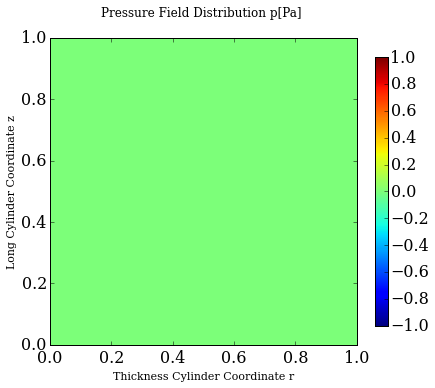

In [31]:
#Make 2D graphic
plt.figure()
plt.subplots(figsize=(6.5,5.5))
#Definition of variable to graph 
fig = plt.imshow(p,extent=[0,lx,0,ly], clim = (-1.,1.))
#Definition of the graph legends
plt.suptitle(u"Pressure Field Distribution p[Pa]", fontsize = 12,fontweight = 'medium', va = 'top')
#plt.title(name_fluid, fontsize= 11)
plt.xlabel('Thickness Cylinder Coordinate r', fontsize = 11)
plt.ylabel('Long Cylinder Coordinate z', fontsize = 11)
#Add a colorbar
plt.colorbar(fraction = 0.037)#orientation='horizontal',fraction = 0.045)
#Show in the screen
plt.show()

In [9]:

for j in range(0,ny):
    for i in range(0,nx):
        
        if i == 0 or i == nx-1:
            u[i,j] = 0.
            v[i,j] = 0.

        elif 0 < i < nx-1 and  0 < j < ny-1:  
            if u_aux[i,j] > 0.:
                u[i,j] = u_aux[i,j] - (dt/dx)*(p[i,j] - p[i-1,j])
            elif u_aux[i,j] < 0.:
                u[i,j] = u_aux[i,j] - (dt/dx)*(p[i+1,j] - p[i,j])
            elif u_aux[i,j] == 0.:
                u[i,j] = u_aux[i,j] - (dt/2*dx)*(p[i+1,j] - p[i-1,j])
            
            if v_aux[i,j] > 0:
                v[i,j] = v_aux[i,j] - (dt/dy)*(p[i,j] - p[i,j-1])
            elif v_aux[i,j] < 0:
                v[i,j] = v_aux[i,j] - (dt/dy)*(p[i,j+1] - p[i,j])
            elif v_aux[i,j] == 0.:
                v[i,j] = v_aux[i,j] - (dt/2*dy)*(p[i,j+1] - p[i,j-1])   
        
        #Velocity Inlet Boundary Conditions
        elif j == 0 and 0 < i < nx-1:
            u[i,j] = 0.
            v[i,j] = 1.
            
        #Velocity Outlet Boundary Conditions
        elif j == ny-1 and 0 < i < nx-1:
            if u_aux[i,j] > 0.:
                u[i,j] = u_aux[i,j] - (dt/dx)*(p[i,j] - p[i-1,j])
            elif u_aux[i,j] < 0.:
                u[i,j] = u_aux[i,j] - (dt/dx)*(p[i+1,j] - p[i,j])
            elif u_aux[i,j] == 0.:
                u[i,j] = u_aux[i,j] - (dt/2*dx)*(p[i+1,j] - p[i-1,j])
                
   
            v[i,j] = v_aux[i,j] - (dt/dy)*(p[i,j] - p[i,j-1])
       
            
print v          
            

[[ 0.          0.          0.          0.          0.        ]
 [ 1.          0.99997171  0.99997771  0.99999657  0.999862  ]
 [ 1.          0.99996571  0.99996486  0.999958    0.99991943]
 [ 1.          0.99996057  0.999958    0.99995114  0.99993829]
 [ 1.          0.999958    0.99995543  0.99995029  0.99994429]
 [ 0.          0.          0.          0.          0.        ]]
